In [1]:
import os
import sys
import tensorflow as tf

directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from NsgaII import Nsga_II
from utils.load_data import load_mnist
from CapsNet import CapsNet

(X_train, y_train), (X_test , y_test) = load_mnist(size=(5000, 3000))

In [2]:
import json
with open('../saved_ga/mnist-gpu0-hpc-2/solutions.json') as file:
    solutions = json.load(file)
    params = solutions['Solution 2']['params']

# params = {'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}

print(params)
NasCapsNet = CapsNet(**params)
NasCapsNet._name = 'NasCapsNet'
NasCapsNet.compile()
NasCapsNet.summary()

{'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}
Model: "NasCapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                             

In [3]:
NasCapsNet.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 4/5: 100%|██████████| 79/79 [00:13<00:00,  6.03it/s]

Validation loss is not decreasing anymore, risk of overfitting the model after 4 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.9584, 0.9764, 0.985]),
 'loss': ListWrapper([0.43947151862084866, 0.24500496219843626, 0.21824322175234556]),
 'val_accuracy': ListWrapper([0.934, 0.953, 0.9576666666666667]),
 'val_loss': ListWrapper([0.29710177332162857, 0.25601405650377274, 0.2440252574160695])}

In [4]:
n_rounds = 100

import time

caps_nas_inv_time = []
for i in range(n_rounds):
    start = time.time()
    NasCapsNet.predict(X_test)
    end = time.time()
    caps_nas_inv_time.append((end - start) / len(X_test) * 1000)
caps_nas_inv_time

[0.5062366326649984,
 0.5063610076904297,
 0.5092470645904541,
 0.5027889410654703,
 0.5065736770629883,
 0.5101087093353271,
 0.5040230751037598,
 0.4997849464416504,
 0.5049459934234619,
 0.5106203556060791,
 0.5211996237436931,
 0.5023753643035889,
 0.5012173652648926,
 0.5042519569396973,
 0.5066796938578287,
 0.49836468696594244,
 0.5017664432525635,
 0.500560998916626,
 0.5031553904215496,
 0.5037469863891602,
 0.5335083802541097,
 0.4984207153320312,
 0.5008979638417562,
 0.5035937627156576,
 0.5070443948109945,
 0.503432035446167,
 0.5066453615824381,
 0.5181962649027506,
 0.5002216498057047,
 0.5011549790700277,
 0.5152107079823811,
 0.5343945821126302,
 0.5047570864359537,
 0.5073826313018799,
 0.49943868319193524,
 0.504529635111491,
 0.49717911084492994,
 0.4969690640767415,
 0.501050631205241,
 0.5015427271525065,
 0.4985810120900472,
 0.5253669420878092,
 0.5117123126983643,
 0.49667771657307946,
 0.49874838193257653,
 0.49947770436604816,
 0.4987186590830485,
 0.50145292

In [5]:
import numpy as np
np.mean(caps_nas_inv_time)

0.5062001236279806

In [6]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "dense_1": 512,
    "dense_2": 1024
}

{
    'epochs': 5, 
    'r': 2,
    'no_of_conv_kernels': 64,
    'secondary_capsule_vector': 6,
    'dense_1': 256,
    'dense_2': 512,
    'epsilon': 0.08411185848750914,
    'm_plus': 0.9504174153527706,
    'm_minus': 0.1648052052496743,
    'lambda_': 0.6831030565866469,
    'alpha': 0.006858184909559632,
    'no_of_primary_capsules': 32,
    'primary_capsule_vector': 8,
    'no_of_secondary_capsules': 10}


BaselineCapsNetModel = CapsNet(**params)
BaselineCapsNetModel._name = 'BaselineCapsNetModel'
BaselineCapsNetModel.compile()
BaselineCapsNetModel.summary()

Model: "BaselineCapsNetModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
 dense_3 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [7]:
BaselineCapsNetModel.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 10/10: 100%|██████████| 79/79 [00:33<00:00,  2.39it/s, Training loss : 0.0001, Validation loss : 0.0005]


{'accuracy': ListWrapper([0.9588, 0.9798, 0.9886, 0.993, 0.9958, 0.997, 0.9974, 0.9986, 0.999, 0.9994]),
 'loss': ListWrapper([0.30605702195316553, 0.07971409941092134, 0.05443979753181338, 0.04131595487706363, 0.033322430681437254, 0.024184344511013478, 0.016818958101794124, 0.012679374776780605, 0.013644897262565792, 0.006422128353733569]),
 'val_accuracy': ListWrapper([0.9343333333333333, 0.96, 0.9573333333333334, 0.962, 0.9663333333333334, 0.962, 0.961, 0.9646666666666667, 0.9676666666666667, 0.9673333333333334]),
 'val_loss': ListWrapper([0.13636703370139003, 0.08990524802356958, 0.07898919866420329, 0.0714529596734792, 0.06609415868297219, 0.0657354248687625, 0.06462794844992459, 0.05720664048567414, 0.05450461176224053, 0.05026375292800367])}

In [8]:
n_rounds = 100

import time

caps_inv_time = []
for i in range(n_rounds):
    start = time.time()
    BaselineCapsNetModel.predict(X_test)
    end = time.time()
    caps_inv_time.append((end - start) / len(X_test) * 1000)

In [9]:
caps_inv_time

[0.9849786758422852,
 0.9738756020863851,
 1.0023093223571777,
 0.9775879383087159,
 0.97749924659729,
 0.975056012471517,
 0.9774400393168132,
 1.0179353555043538,
 1.0273423194885254,
 0.9843643506368002,
 0.9768052895863851,
 0.9875540733337402,
 0.9766937096913656,
 1.0144139925638835,
 0.9787672360738119,
 0.9778250058492025,
 0.9811283747355143,
 0.9806539217631022,
 1.0011420249938965,
 0.9765690167744955,
 0.9732880592346191,
 0.9821174144744873,
 0.9947509765624999,
 0.9738920529683431,
 1.0202913284301758,
 0.9798829555511473,
 0.974209705988566,
 0.9712783495585123,
 0.9850940704345702,
 1.021730661392212,
 0.9869856834411621,
 0.9748443762461344,
 0.9829446474711101,
 0.9927866458892822,
 0.9995126724243164,
 0.9904109636942545,
 0.9766242504119873,
 0.9741823673248291,
 0.9826979637145997,
 0.9897614320119221,
 1.0143073399861655,
 0.981199343999227,
 0.9799133936564128,
 0.984889030456543,
 0.974107583363851,
 1.0002706845601401,
 0.9847597281138103,
 0.9769438902537029,


In [10]:
import numpy as np

np.mean(caps_inv_time)

0.9890664688746135

In [11]:
ConvNetModel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
ConvNetModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               540900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [12]:
ConvNetModel.compile(tf.optimizers.legacy.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
tf_y_train = tf.keras.utils.to_categorical(y_train)
tf_y_test = tf.keras.utils.to_categorical(y_test)

In [13]:
history = ConvNetModel.fit(X_train, tf_y_train, epochs=10, batch_size=32, validation_data=(X_test, tf_y_test))

Epoch 1/10
157/157 [==============================] - 1s 6ms/step - loss: 0.5370 - accuracy: 0.8374 - val_loss: 0.3516 - val_accuracy: 0.8977
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1983 - accuracy: 0.9436 - val_loss: 0.2495 - val_accuracy: 0.9247
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1203 - accuracy: 0.9650 - val_loss: 0.2042 - val_accuracy: 0.9337
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0762 - accuracy: 0.9776 - val_loss: 0.1870 - val_accuracy: 0.9360
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0505 - accuracy: 0.9856 - val_loss: 0.1690 - val_accuracy: 0.9447
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0336 - accuracy: 0.9926 - val_loss: 0.1720 - val_accuracy: 0.9430
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0199 - accuracy: 0.9964 - val_loss: 0.1577 - val_accuracy: 0.9467
Epoch 

In [14]:
history.history

{'loss': [0.5370479226112366,
  0.19834811985492706,
  0.12031260132789612,
  0.07620009779930115,
  0.05047306418418884,
  0.03359150514006615,
  0.01994277909398079,
  0.010501358658075333,
  0.00699532451108098,
  0.0037715956568717957],
 'accuracy': [0.8374000191688538,
  0.9435999989509583,
  0.9649999737739563,
  0.9775999784469604,
  0.9855999946594238,
  0.9926000237464905,
  0.996399998664856,
  0.9991999864578247,
  0.9991999864578247,
  1.0],
 'val_loss': [0.3516131043434143,
  0.2495173066854477,
  0.20416530966758728,
  0.18703991174697876,
  0.1690417379140854,
  0.17196610569953918,
  0.15773971378803253,
  0.16038209199905396,
  0.16519230604171753,
  0.16001667082309723],
 'val_accuracy': [0.8976666927337646,
  0.9246666431427002,
  0.9336666464805603,
  0.9359999895095825,
  0.9446666836738586,
  0.9430000185966492,
  0.9466666579246521,
  0.9513333439826965,
  0.9516666531562805,
  0.9543333053588867]}

In [15]:
n_rounds = 100

import time

cnn_inv_time = []
for i in range(n_rounds):
    start = time.time()
    ConvNetModel.predict(X_test)
    end = time.time()
    cnn_inv_time.append((end - start) / len(X_test) * 1000)

94/94 [==============================] - 0s 1ms/step


In [16]:
cnn_inv_time

[0.0686937173207601,
 0.054840644200642906,
 0.05389300982157389,
 0.05254554748535156,
 0.05321232477823894,
 0.05278491973876953,
 0.05283776919047038,
 0.05466906229654948,
 0.05363003412882487,
 0.0522759755452474,
 0.06339772542317708,
 0.05316964785257976,
 0.056945641835530594,
 0.05353903770446777,
 0.05415264765421549,
 0.05337262153625488,
 0.052655935287475586,
 0.054508606592814125,
 0.053639332453409835,
 0.0540000597635905,
 0.055321693420410156,
 0.05379263559977214,
 0.0544730027516683,
 0.055032968521118164,
 0.05436333020528158,
 0.054591735204060875,
 0.053743600845336914,
 0.053602615992228195,
 0.0549310048421224,
 0.05430038770039876,
 0.053689002990722656,
 0.05867266654968262,
 0.058678627014160156,
 0.05760399500528971,
 0.05787126223246257,
 0.052156686782836914,
 0.05291295051574707,
 0.0524906317392985,
 0.05238874753316243,
 0.052717367808024086,
 0.05271299680074056,
 0.05283705393473307,
 0.05212704340616862,
 0.05168604850769043,
 0.052601655324300126,
 

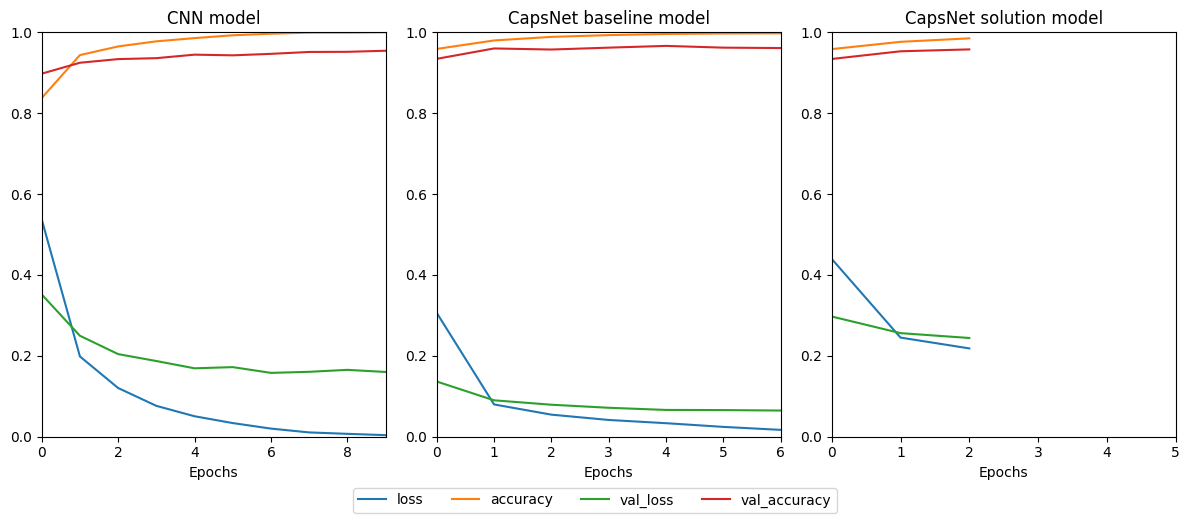

In [17]:
import matplotlib.pyplot as plt
import time
import pandas as pd

NasCapsNet.training_metrics = {
    'loss': NasCapsNet.training_metrics['loss'],
    'accuracy': NasCapsNet.training_metrics['accuracy'],
    'val_loss': NasCapsNet.training_metrics['val_loss'],
    'val_accuracy': NasCapsNet.training_metrics['val_accuracy'],
}

BaselineCapsNetModel.training_metrics = {
    'loss': BaselineCapsNetModel.training_metrics['loss'],
    'accuracy': BaselineCapsNetModel.training_metrics['accuracy'],
    'val_loss': BaselineCapsNetModel.training_metrics['val_loss'],
    'val_accuracy': BaselineCapsNetModel.training_metrics['val_accuracy'],
}

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

df_baseline = pd.DataFrame(history.history)
plot_baseline = df_baseline.plot(ax=axes[0], title="CNN model", legend=False)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, 9)

df_capsnet = pd.DataFrame(BaselineCapsNetModel.training_metrics)
plot_capsnet = df_capsnet.plot(ax=axes[1], title="CapsNet baseline model", legend=False)  # Set legend=False here
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 6)

df_capsnet_nas = pd.DataFrame(NasCapsNet.training_metrics)
plot_capsnet_nas = df_capsnet_nas.plot(ax=axes[2], title="CapsNet solution model", legend=False)  # Set legend=False here
axes[2].set_ylim(0, 1)
axes[2].set_xlim(0, 5)

axes[0].set_xlabel("Epochs")
axes[1].set_xlabel("Epochs")
axes[2].set_xlabel("Epochs")

# Show only one legend for all three plots
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=4)

plt.tight_layout()
plt.show()


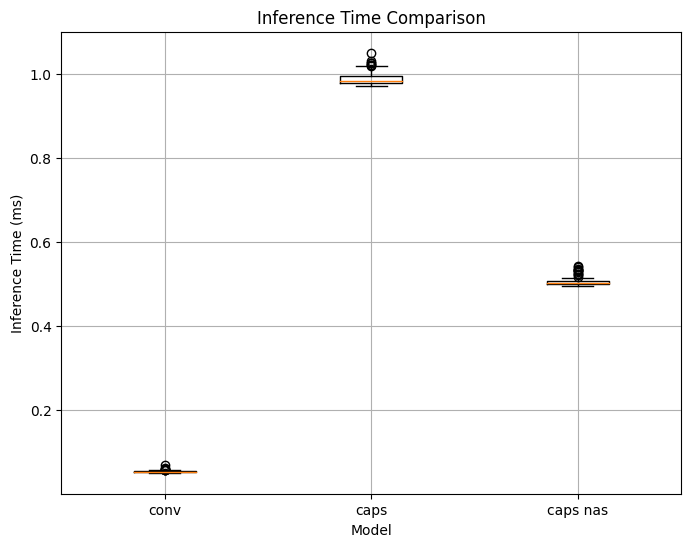

In [18]:
df = pd.DataFrame({
    "conv": cnn_inv_time,
    "caps": caps_inv_time,
    "caps nas": caps_nas_inv_time
})
plt.figure(figsize=(8, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (ms)')
plt.grid(True)
plt.show()

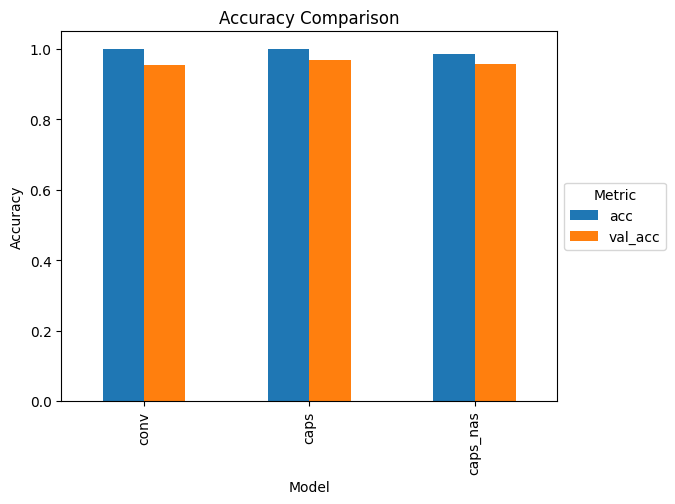

In [19]:
df = pd.DataFrame({
    'conv': {'acc': history.history['accuracy'][-1], 'val_acc': history.history['val_accuracy'][-1]},
    'caps': {'acc': BaselineCapsNetModel.training_metrics['accuracy'][-1], 'val_acc': BaselineCapsNetModel.training_metrics['val_accuracy'][-1]},
    'caps_nas': {'acc': NasCapsNet.training_metrics['accuracy'][-1], 'val_acc': NasCapsNet.training_metrics['val_accuracy'][-1]},
})

df = df.T
df.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()